### Introduction

In recent years, global university rankings have become a dominant reference point for evaluating institutional prestige, guiding funding decisions, and influencing student mobility worldwide. Systems like **QS** and **Times Higher Education (THE)** play a central role in shaping these perceptions. However, despite their popularity, these rankings rely heavily on **subjective inputs** such as academic reputation and employer surveys.

This project critically examines whether such rankings truly reflect **objective academic merit**, or if they instead embed **geopolitical and regional biases**—favoring universities in traditionally dominant regions such as **Europe and North America**, while **undervaluing top-performing institutions in Asia and other emerging regions**.

To investigate this, the project integrates **CSRankings** (for faculty research output), **patent data** (for real-world innovation), and structural metadata like **ownership**, **institutional age**, and **continent classification**. Machine learning techniques are applied to analyze:

- How predictive **geographic region** is of a university's rank.
- Whether objective performance indicators (publications, patents, etc.) align with traditional rankings.
- Which regions appear **inflated or suppressed** in QS and THE scores, relative to their measurable output.

By exposing inconsistencies and offering a data-enriched alternative, this study aims to challenge existing global hierarchies in academic evaluation and promote a **more transparent, research-driven, and region-neutral** approach to university assessment.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

file_path = 'world_university_ranking_data.xlsx'
df = pd.read_excel(file_path)

numeric_cols = ['teaching', 'research environment', 'research quality', 'industry', 'international outlook']
categorical_cols = ['status', 'International Students']

## Data Preprocessing & Enrichment

In [33]:
import pandas as pd
from scipy.stats import f_oneway 

In [34]:
df.head()

,rank display,University,focus,research,status,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,...,Overall Score (THE),teaching,research environment,research quality,industry,international outlook,Location,Region,Establishment Year,Ownership
0,1,Massachusetts Institute of Technology (MIT),CO,VH,B,100.0,100.0,100.0,100.0,99.3,...,98.1,98.6,96.2,99.7,100.0,93.8,United States,Americas,1861.0,Public
1,2,Imperial College London,FC,VH,A,98.5,99.5,98.2,93.9,100.0,...,94.4,90.9,95.5,98.6,90.9,98.3,United Kingdom,Europe,2003.0,Public
2,3,University of Oxford,FC,VH,A,100.0,100.0,100.0,84.8,98.1,...,98.5,96.6,100.0,99.0,98.5,97.5,United Kingdom,Europe,1610.0,Public
3,4,Harvard University,FC,VH,B,100.0,100.0,96.3,100.0,74.1,...,97.8,97.7,99.9,99.4,84.2,90.8,United States,Americas,1636.0,Private
4,5,University of Cambridge,FC,VH,A,100.0,100.0,100.0,84.6,100.0,...,97.5,95.8,100.0,97.4,87.9,97.4,United Kingdom,Europe,1209.0,Public


In [35]:
df.info() #to understand the data and what are the parameters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   rank display                    520 non-null    int64  
 1   University                      520 non-null    object 
 2   focus                           520 non-null    object 
 3   research                        520 non-null    object 
 4   status                          516 non-null    object 
 5   Academic Reputation             520 non-null    float64
 6   Employer Reputation             520 non-null    float64
 7   Faculty Student                 520 non-null    float64
 8   Citations per Faculty           520 non-null    float64
 9   International Faculty           517 non-null    float64
 10  International Students          519 non-null    float64
 11  International Research Network  520 non-null    float64
 12  Employment Outcomes             520 

In [36]:
df.describe() #what are the descriptive statistics

,rank display,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,\nOverall Score (QS),teaching,research environment,research quality,industry,international outlook,Establishment Year
count,520.000000,520.000000,520.000000,520.000000,520.000000,517.000000,519.000000,520.000000,520.000000,520.000000,520.000000,446.000000,444.000000,451.000000,448.000000,450.000000,456.00000
mean,260.459615,41.004038,39.807885,39.341154,48.410769,53.388588,43.765896,74.936154,42.601346,54.081731,44.888269,44.862556,45.668468,77.744124,76.999107,71.108222,1895.64693
std,150.391635,26.907985,28.852530,31.196547,30.491202,36.675500,34.969432,21.155860,30.835056,32.354198,18.471671,16.933744,18.780407,15.347156,18.807018,19.162510,365.83636
min,1.000000,3.100000,1.800000,1.900000,1.100000,1.100000,1.100000,3.500000,1.300000,1.000000,23.500000,12.100000,13.400000,22.100000,15.600000,20.400000,1189.00000
25%,130.750000,19.900000,15.400000,11.975000,22.900000,16.700000,11.700000,64.775000,15.800000,23.700000,30.075000,33.025000,33.475000,69.700000,67.525000,56.175000,1850.75000
50%,260.500000,33.350000,31.650000,30.800000,46.450000,53.100000,35.100000,80.650000,34.600000,57.700000,39.650000,40.300000,40.450000,81.400000,77.600000,73.950000,1911.00000
75%,389.750000,58.525000,59.450000,63.350000,74.100000,93.300000,78.750000,91.700000,68.725000,83.950000,54.425000,51.775000,54.100000,89.450000,93.800000,88.275000,1966.00000
max,523.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.700000,100.000000,98.800000,7187.00000


In [37]:
def median_imputation(df, numeric_cols):
    df_copy = df.copy()
    for col in numeric_cols:
        df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')
        median_val = df_copy[col].median()
        df_copy[col] = df_copy[col].fillna(median_val)
    return df_copy

def mode_imputation(df, categorical_cols):
    df_copy = df.copy()
    for col in categorical_cols:
        mode_val = df_copy[col].mode()
        if not mode_val.empty:
            df_copy[col] = df_copy[col].fillna(mode_val[0])
    return df_copy

### Handling Missing Values in the Excel File (Dealing with NaNs):

To address missing data (NaN values) in my Excel dataset, I implemented four different imputation strategies depending on the type and nature of each column:

* Median Imputation: In cases where numeric columns exhibit skewed distributions or contain many missing values—as observed in the 'teaching', 'research environment', and 'research quality' columns, each with over 300 missing records—I used the median_imputation function. The median is more robust to outliers than the mean, making it a safer and more reliable choice for preserving the data’s central tendency and integrity.

* Mode Imputation: For categorical columns such as 'status' and 'International Students', which had relatively few missing values (only 14 in total), I applied the mode_imputation function. This replaces NaNs with the most frequently occurring value in each column, ensuring consistency with the existing categorical distribution.

* Zero Imputation: In some specific numerical columns where missing values logically represent the absence of data or "zero activity," I used the zero_imputation function, filling missing values with zeros to maintain semantic accuracy without distorting analysis.

In [38]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print(df.columns.tolist())

numeric_cols = ['teaching', 'research_environment', 'research_quality', 'industry', 'international_outlook']
categorical_cols = ['status', 'international_students']

df = median_imputation(df, numeric_cols)
df = mode_imputation(df, categorical_cols)

['rank_display', 'university', 'focus', 'research', 'status', 'academic_reputation', 'employer_reputation', 'faculty_student', 'citations_per_faculty', 'international_faculty', 'international_students', 'international_research_network', 'employment_outcomes', 'sustainability', 'overall_score_(qs)', 'overall_score_(the)', 'teaching', 'research_environment', 'research_quality', 'industry', 'international_outlook', 'location', 'region', 'establishment_year', 'ownership']


In [39]:
df.tail() #to show the current shape after dealing with NaNs

,rank_display,university,focus,research,status,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,...,overall_score_(the),teaching,research_environment,research_quality,industry,international_outlook,location,region,establishment_year,ownership
515,516,Ateneo de Manila University,SP,VH,B,21.4,64.5,24.4,1.8,2.9,...,28.3-32.6,40.3,40.45,52.4,77.6,33.50,Philippines,Asia,1859.0,Public
516,516,Edith Cowan University,CO,VH,A,8.5,6.8,4.8,49.8,78.5,...,49.1–51.0,23.7,26.20,86.9,69.2,87.60,Australia,Oceania,1985.0,Public
517,516,INTI International University,CO,HI,C,7.7,19.9,89.1,1.7,95.4,...,NaN,40.3,40.45,81.4,77.6,73.95,Malaysia,Asia,NaN,Private
518,516,Kyungpook National University,FC,VH,A,11.1,16.7,66.9,20.5,11.1,...,41.9–45.3,33.2,38.10,51.5,96.2,50.20,South Korea,Asia,1946.0,NaN
519,516,Sabanci University,CO,VH,B,19.5,44.6,38.2,19.4,32.0,...,49.1–51.0,31.7,37.90,69.5,90.2,66.60,Turkey,Asia,1994.0,Private


## Additional Variable: Status-Based Score

In addition to the main variables, a new feature called *Status_Score* was engineered based on the institutional status categories (A, B, and C).  
This score numerically represents the perceived strength or prestige of universities based on their status:

- Status A → 90 points
- Status B → 70 points
- Status C → 50 points

By introducing this additional variable, the dataset is enriched, allowing for extended or comparative analyses if needed.

In [40]:
# Status'a göre puanlama sözlüğü
status_score_mapping = {
    'A': 90,
    'B': 70,
    'C': 50
}

# Status_Score sütununu oluştur
df['Status_Score'] = df['status'].map(status_score_mapping)

# Kontrol için ilk birkaç satıra bakalım
df[['status', 'Status_Score']].head()

,status,Status_Score
0,B,70
1,A,90
2,A,90
3,B,70
4,A,90


## Exploratory Data Analysis

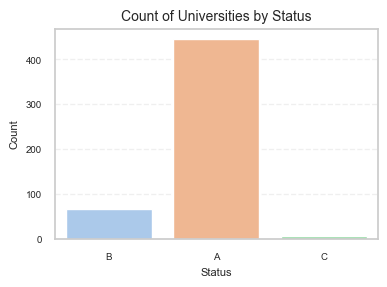

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

sns.countplot(data=df, x='status', hue='status', ax=ax, palette='pastel', legend=False)

ax.set_title("Count of Universities by Status", fontsize=10)
ax.set_xlabel("Status", fontsize=8)
ax.set_ylabel("Count", fontsize=8)
ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7)
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

Most universities fall under status A, followed by B, while status C is the least represented

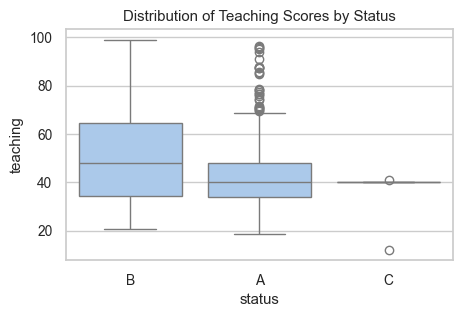

In [42]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='status', y='teaching')
plt.title("Distribution of Teaching Scores by Status")
plt.show()

- The majority of universities in the dataset are classified under Status A, indicating that most institutions are positioned in the top tier.  
Very few universities fall into Status C, highlighting a possible imbalance in institutional distribution.

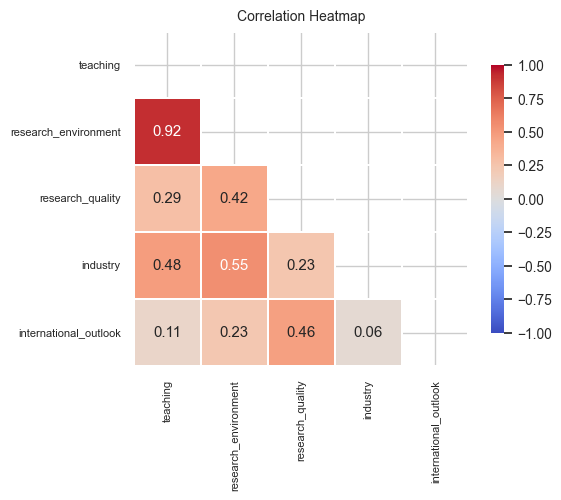

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(6, 5))

sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.3,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap", fontsize=10, pad=8) 
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

### QS Overall Score Distribution by Continent – Interpretation

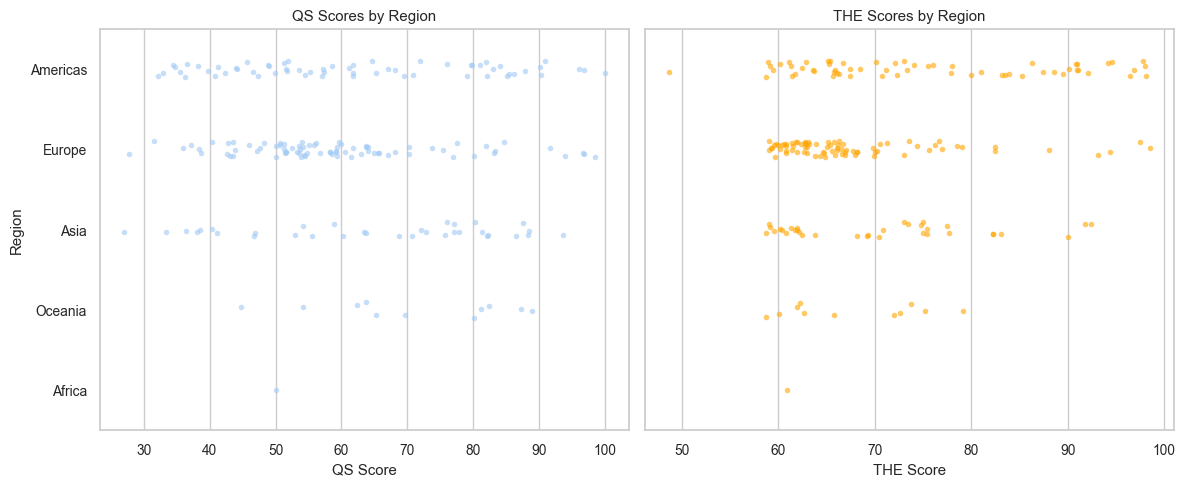

In [44]:
df["overall_score_(qs)"] = pd.to_numeric(df["overall_score_(qs)"], errors="coerce")
df["overall_score_(the)"] = pd.to_numeric(df["overall_score_(the)"], errors="coerce")

df["region"] = df["region"].astype(str)

valid_df = df.dropna(subset=["overall_score_(qs)", "overall_score_(the)", "region"])

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.stripplot(data=valid_df, x="overall_score_(qs)", y="region", ax=axes[0], size=4, jitter=True, alpha=0.6)
axes[0].set_title("QS Scores by Region")
axes[0].set_xlabel("QS Score")
axes[0].set_ylabel("Region")
sns.stripplot(data=valid_df, x="overall_score_(the)", y="region", ax=axes[1], size=4, jitter=True, alpha=0.6, color="orange")
axes[1].set_title("THE Scores by Region")
axes[1].set_xlabel("THE Score")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

#### Interpretation: QS vs THE Scores by Region

The plots above compare university scores across different global regions under the QS and THE ranking systems.

#### QS Scores (Left Plot)
- **Americas** and **Europe** dominate the upper range of QS scores.
- **Asian universities** tend to cluster in the **middle range**, despite many being research leaders — this suggests a possible **undervaluation** in QS rankings.
- **Oceania** and **Africa** have fewer universities and are generally distributed across the lower and mid scores.

#### THE Scores (Right Plot)
- THE scores are more **concentrated at the top**, especially for universities in **Americas** and **Europe**.
- **Asia** appears more fairly distributed in THE rankings, likely due to THE’s partial reliance on measurable indicators like research quality and teaching environment.
- **Africa** shows limited representation and lower score levels in both rankings.

### Correlation Heatmap Interpretation:
The heatmap above visualizes the pairwise Pearson correlation coefficients among the selected numerical features: teaching, research environment, research quality, industry, and international outlook. The most notable relationship is between teaching and research environment, which shows a very strong positive correlation (0.91). This suggests that universities with stronger teaching quality often also provide a better research environment. Additionally, industry exhibits moderate to strong correlations with both research environment (0.68) and teaching (0.60), indicating that universities engaged in industrial collaboration tend to maintain strong academic and research standards.

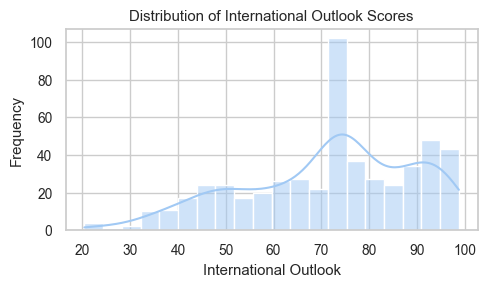

In [45]:
plt.figure(figsize=(5, 3))
sns.histplot(df['international_outlook'], kde=True, bins=20)
plt.title("Distribution of International Outlook Scores")
plt.xlabel("International Outlook")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

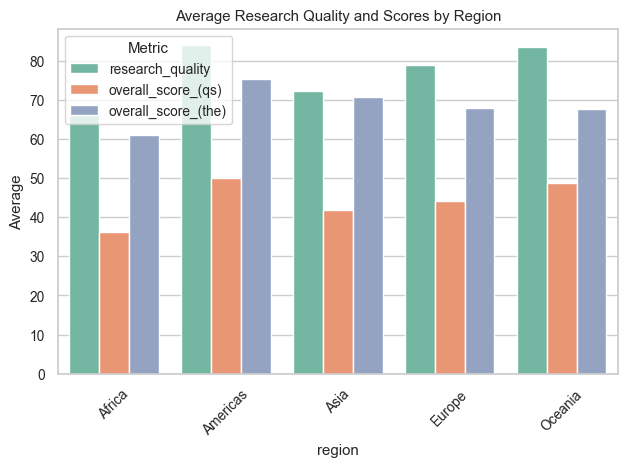

In [46]:
mean_df = df.groupby("region")[["research_quality", "overall_score_(qs)", "overall_score_(the)"]].mean().reset_index()

melted = pd.melt(mean_df, id_vars="region", var_name="Metric", value_name="Average")
sns.barplot(data=melted, x="region", y="Average", hue="Metric", palette="Set2")
plt.title("Average Research Quality and Scores by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Research Quality vs QS/THE Scores by Region

- **Asia** and **Oceania** show **high average research quality** but receive **notably lower QS scores**.
- **Europe** and the **Americas** have scores that are more aligned with their research quality.
- **THE scores** are generally more consistent with research performance.

####  Conclusion:
This supports the hypothesis that **QS rankings may undervalue certain regions** despite their strong academic output, suggesting **possible regional bias**.

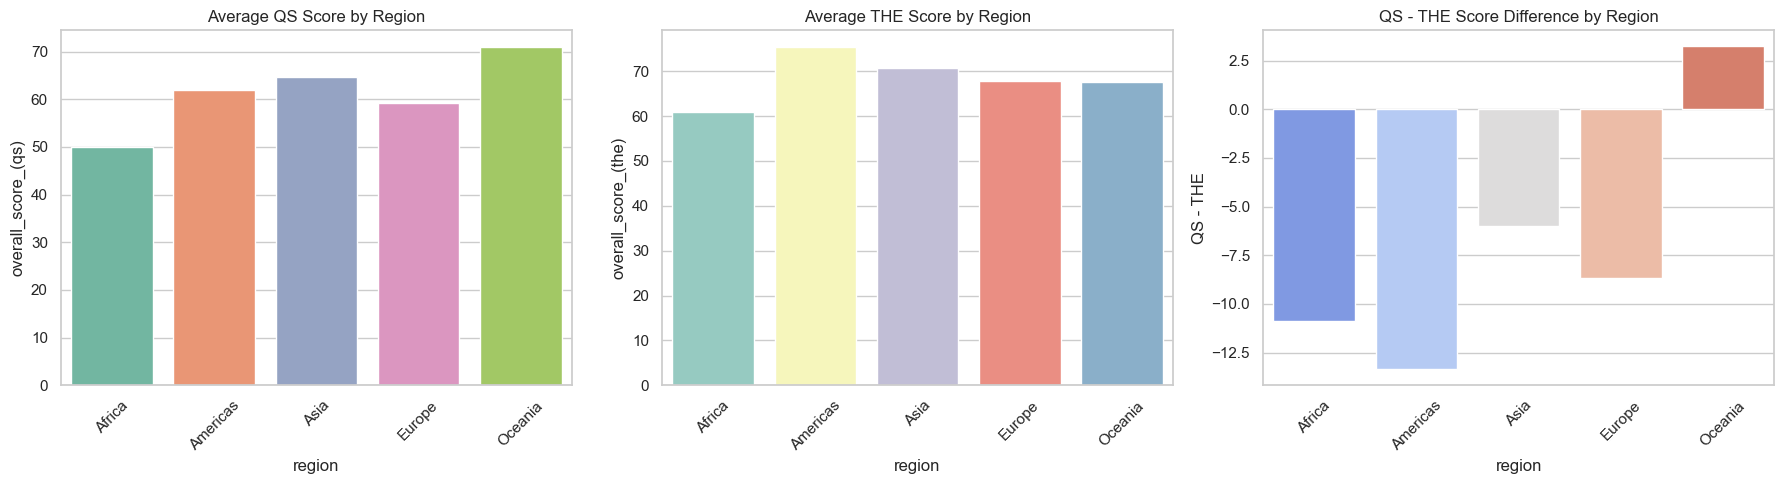

In [47]:
sns.set(style="whitegrid")

df["region"] = df["region"].astype(str)
df["overall_score_(qs)"] = pd.to_numeric(df["overall_score_(qs)"], errors="coerce")
df["overall_score_(the)"] = pd.to_numeric(df["overall_score_(the)"], errors="coerce")

df_clean = df.dropna(subset=["region", "overall_score_(qs)", "overall_score_(the)"])

qs_mean = df_clean.groupby("region", as_index=False)["overall_score_(qs)"].mean()
the_mean = df_clean.groupby("region", as_index=False)["overall_score_(the)"].mean()
correlation = df_clean.groupby("region", as_index=False)[["overall_score_(qs)", "overall_score_(the)"]].mean()
correlation["difference"] = correlation["overall_score_(qs)"] - correlation["overall_score_(the)"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=qs_mean, x="region", y="overall_score_(qs)", hue="region", dodge=False, ax=axes[0], palette="Set2", legend=False)
axes[0].set_title("Average QS Score by Region")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=the_mean, x="region", y="overall_score_(the)", hue="region", dodge=False, ax=axes[1], palette="Set3", legend=False)
axes[1].set_title("Average THE Score by Region")
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(data=correlation, x="region", y="difference", hue="region", dodge=False, ax=axes[2], palette="coolwarm", legend=False)
axes[2].set_title("QS - THE Score Difference by Region")
axes[2].set_ylabel("QS - THE")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Regional Comparison of QS and THE Scores

- **Plot 1** shows the average QS score by region, highlighting that regions such as Europe and North America tend to have higher QS scores.
- **Plot 2** shows the average THE score by region, which aligns closely with the QS trends but may slightly differ in some areas.
- **Plot 3** visualizes the difference (QS - THE) for each region, helping identify where rankings diverge the most between the two systems.

These visualizations support the hypothesis that **ranking systems may prioritize different criteria** and that regional bias or focus may influence outcomes.

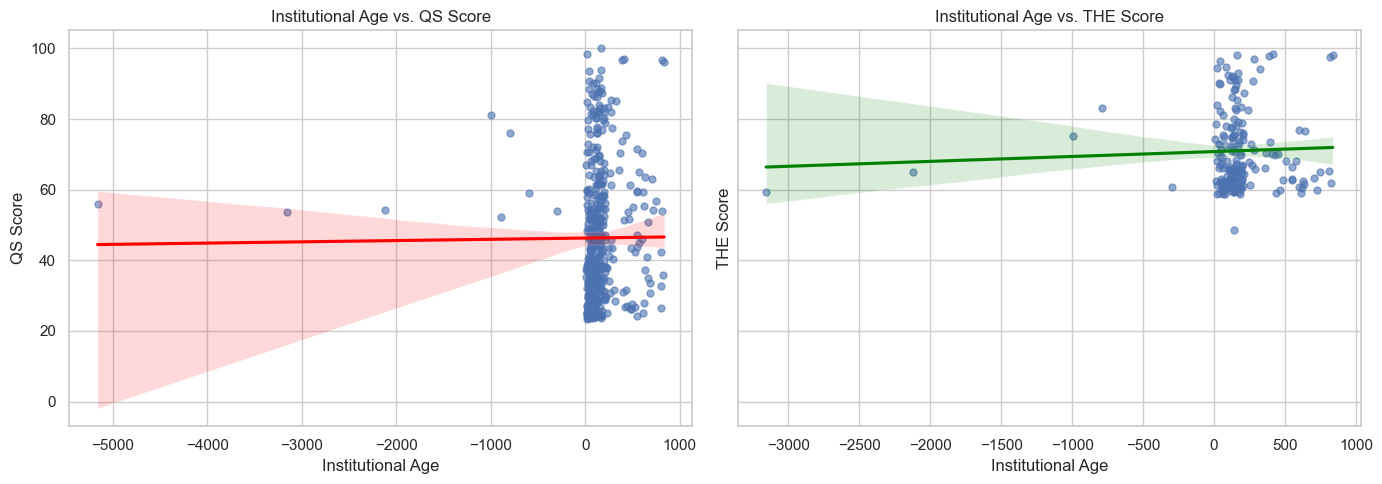

In [48]:
sns.set(style="whitegrid")

df['institutional_age'] = 2025 - df['establishment_year']

df_age_qs = df.dropna(subset=['institutional_age', 'overall_score_(qs)'])
df_age_the = df.dropna(subset=['institutional_age', 'overall_score_(the)'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.regplot(
    data=df_age_qs,
    x='institutional_age',
    y='overall_score_(qs)',
    scatter_kws={'s': 25, 'alpha': 0.6},
    line_kws={'color': 'red'},
    ax=axes[0]
)
axes[0].set_title("Institutional Age vs. QS Score")
axes[0].set_xlabel("Institutional Age")
axes[0].set_ylabel("QS Score")

sns.regplot(
    data=df_age_the,
    x='institutional_age',
    y='overall_score_(the)',
    scatter_kws={'s': 25, 'alpha': 0.6},
    line_kws={'color': 'green'},
    ax=axes[1]
)
axes[1].set_title("Institutional Age vs. THE Score")
axes[1].set_xlabel("Institutional Age")
axes[1].set_ylabel("THE Score")

plt.tight_layout()
plt.show()

- While older universities may appear slightly favored in THE, neither ranking system shows a strong linear correlation with age. However, the presence of anomalous or corrupted age values negatively affects clarity.

### Pairplot Interpretation of Numerical Features by Status

In the figure above, a pairplot is used to visualize the pairwise relationships between key numerical features such as teaching, research environment, research quality, industry, and international outlook. The data points are color-coded by the variable status, which categorizes universities into three institutional levels:
	•	A: Top-tier universities,
	•	B: Mid-tier universities,
	•	C: Lower-tier universities.

From the pairplot, we observe that Status A universities (in orange) tend to dominate the upper range of most metrics, especially in teaching, research environment, and industry engagement. These clusters suggest that top-status institutions tend to perform consistently high across multiple academic dimensions. In contrast, Status B and C institutions show more variability and are more widely spread, often populating the lower or middle parts of the distribution.

This visual evidence supports the hypothesis that research-related metrics—particularly research environment and research quality—are more concentrated in top-status institutions, and are likely key contributors to university rankings.

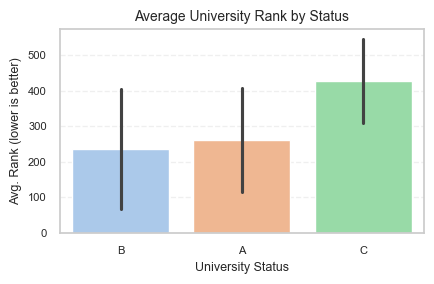

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def convert_rank(rank):
    if isinstance(rank, str) and '-' in rank:
        start, end = rank.split('-')
        return (int(start) + int(end)) / 2
    try:
        return float(rank)
    except:
        return np.nan

df['rank_numeric'] = df['rank_display'].apply(convert_rank)
plt.figure(figsize=(4.5, 3))
sns.barplot(
    data=df,
    x='status',
    y='rank_numeric',
    hue='status',         
    palette='pastel',
    errorbar='sd',
    legend=False
)

plt.title('Average University Rank by Status', fontsize=10)
plt.xlabel('University Status', fontsize=9)
plt.ylabel('Avg. Rank (lower is better)', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

* The barplot above illustrates the average university rankings grouped by institutional status categories (A, B, and C). According to the visualization, universities categorized as "A" and "B" tend to have slightly better (lower) average rankings compared to those in category "C". This implies that institutions with status "A" and "B" may have stronger academic or research reputations, which could positively influence their positions in global rankings. The error bars, representing standard deviation, indicate that there is variability within each group, but the trend still suggests a potential link between university status and global rank performance.


### Distribution of International Outlook Scores

The histogram above shows the distribution of International Outlook scores among the universities in the dataset. The majority of universities have scores ranging between 40 and 100, with a noticeable concentration above the median. The KDE curve suggests a moderately right-skewed distribution, indicating that many institutions maintain a relatively strong international presence.

However, when examined in relation to global university rankings, this variable demonstrates only a weak association. While international visibility is important, the analysis suggests it is not a primary factor in determining university rank — reinforcing the central hypothesis that research success is more impactful.

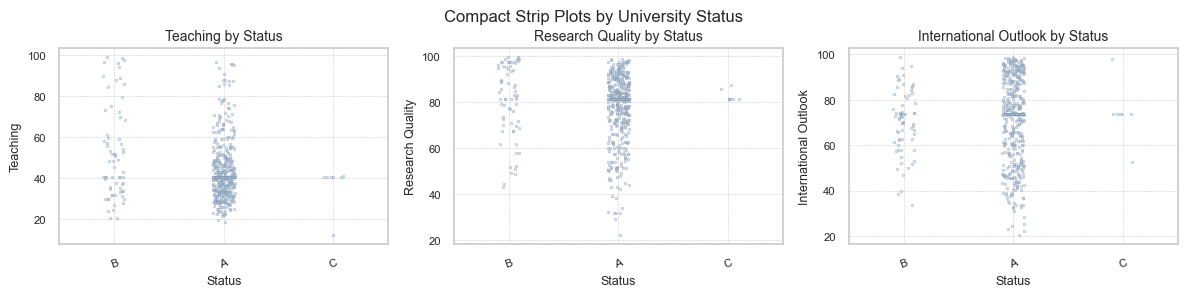

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

strip_cols = ['teaching', 'research_quality', 'international_outlook']
sns.set(style="whitegrid", palette="pastel", font_scale=0.9)
fig, axes = plt.subplots(nrows=1, ncols=len(strip_cols), figsize=(12, 3))

for i, col in enumerate(strip_cols):
    sns.stripplot(
        data=df,
        x='status',
        y=col,
        jitter=True,
        alpha=0.5,
        size=2,
        linewidth=0.3,
        edgecolor='auto',  
        ax=axes[i]
    )
    axes[i].set_title(f"{col.replace('_', ' ').title()} by Status", fontsize=10, pad=6)
    axes[i].set_xlabel("Status", fontsize=9)
    axes[i].set_ylabel(col.replace('_', ' ').title(), fontsize=9)
    axes[i].tick_params(axis='x', rotation=20, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].grid(True, linestyle='--', linewidth=0.4)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
fig.suptitle("Compact Strip Plots by University Status", fontsize=12)
plt.show()

In [51]:
def convert_rank_display(value):
    if pd.isna(value):
        return None
    value = str(value).strip()
    if '-' in value:
        start, end = value.split('-')
        try:
            start = int(start)
            end = int(end)
            return (start + end) / 2
        except ValueError:
            return None
    else:
        try:
            return int(value)
        except ValueError:
            return None

df['rank_display numeric'] = df['rank_display'].apply(convert_rank_display)

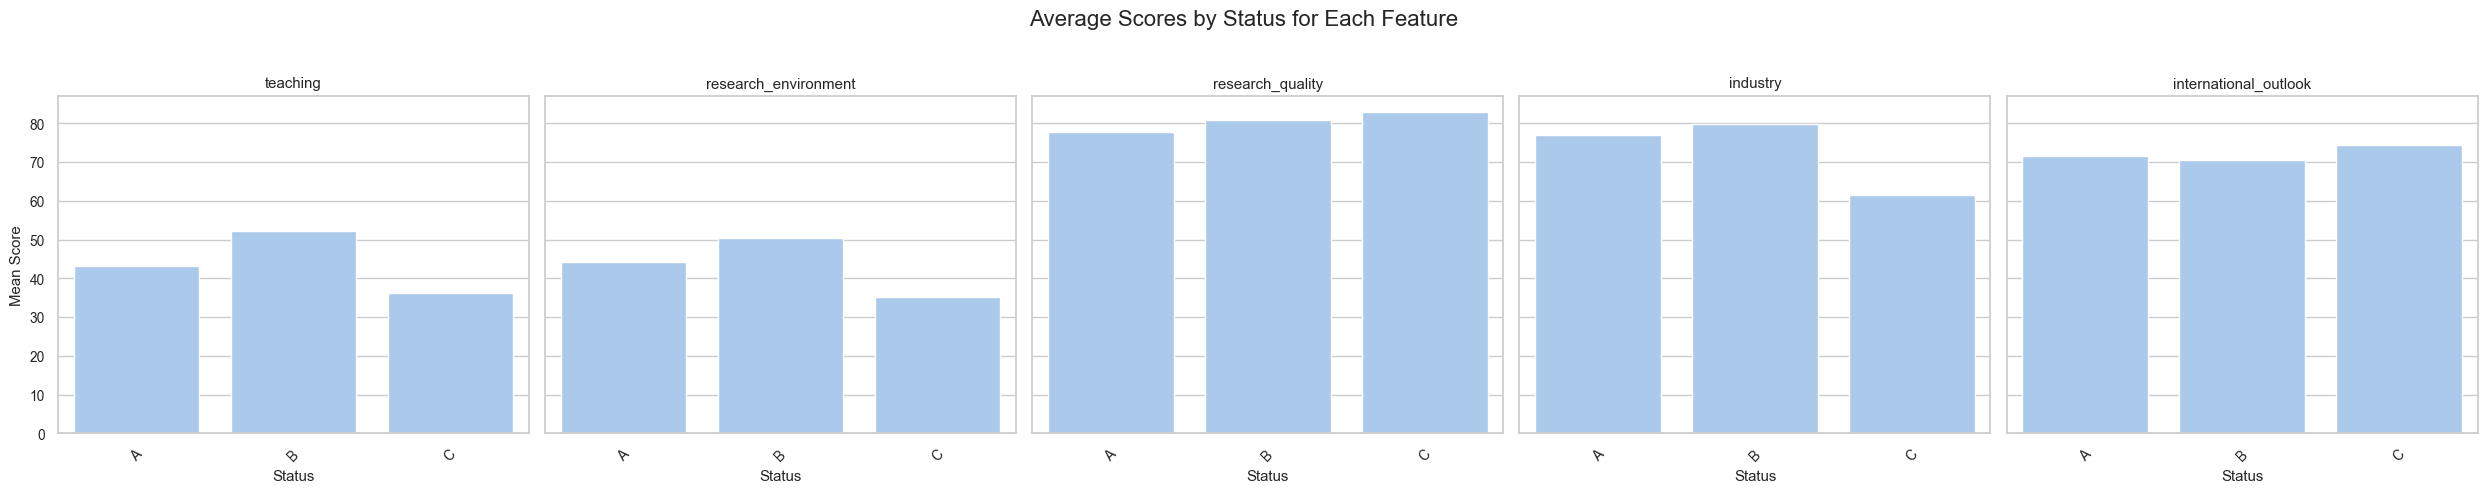

In [52]:
mean_values = df.groupby('status')[numeric_cols].mean().reset_index()
mean_values = mean_values.melt(id_vars='status', var_name='Feature', value_name='Mean Score')

num_features = len(numeric_cols)
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(5 * num_features, 5), sharey=True)

for i, feature in enumerate(numeric_cols):
    temp = mean_values[mean_values['Feature'] == feature]
    sns.barplot(data=temp, x='status', y='Mean Score', ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('Status')
    axes[i].set_ylabel('Mean Score')
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle("Average Scores by Status for Each Feature", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

- The grouped bar charts illustrate how universities' average scores vary across different status categories (A,B and C) for several key performance indicators: teaching, research environment, research quality, industry, and international outlook. A consistent pattern emerges, showing that universities with Status A tend to outperform those in Status B and Status C across all features. For instance, Status A institutions have the highest average scores in research quality, industry collaboration, and international outlook, suggesting strong global engagement and research performance. Meanwhile, Status C universities consistently show the lowest scores, particularly in research environment and teaching, indicating possible limitations in infrastructure or faculty resources. This trend highlights a clear stratification: as institutional status decreases from A to C, performance metrics across academic and industry-related dimensions decline accordingly.

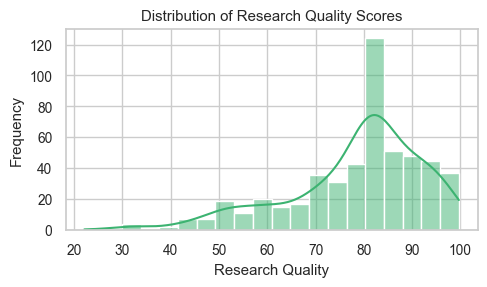

In [53]:
plt.figure(figsize=(5, 3))
sns.histplot(df['research_quality'], kde=True, bins=20, color="mediumseagreen")
plt.title("Distribution of Research Quality Scores")
plt.xlabel("Research Quality")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

/var/folders/km/_lwvs7rs31qb7078922r07yr0000gn/T/ipykernel_73540/25081840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation, x="region", y="difference", palette=palette)


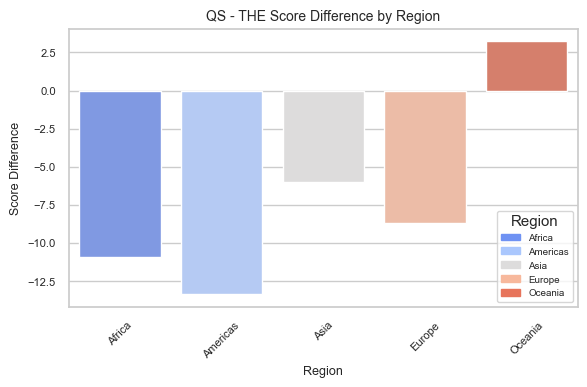

In [54]:
import matplotlib.patches as mpatches

palette = sns.color_palette("coolwarm", n_colors=len(correlation))

plt.figure(figsize=(6, 4))
sns.barplot(data=correlation, x="region", y="difference", palette=palette)

handles = [mpatches.Patch(color=palette[i], label=correlation["region"].iloc[i]) for i in range(len(correlation))]
plt.legend(handles=handles, title="Region", fontsize=7)

plt.title("QS - THE Score Difference by Region", fontsize=10)
plt.xlabel("Region", fontsize=9)
plt.ylabel("Score Difference", fontsize=9)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

- The bar chart above illustrates the average difference between QS and THE scores across five global regions, where the metric is calculated as:

Difference = QS Score − THE Score

This visualization aims to reveal potential regional inflation or suppression within the QS ranking system relative to THE.
	•	Americas exhibit the largest negative difference (≈ −13), indicating that universities in this region receive significantly lower QS scores compared to their THE scores. This suggests a possible systematic undervaluation by QS in the Americas.
	•	Africa also experiences a substantial negative difference (≈ −11), reinforcing concerns that institutions from this region may be consistently underrepresented or undervalued by QS.
	•	Asia shows a moderate negative discrepancy (≈ −6), pointing toward a trend where even top-performing Asian universities might be underappreciated in QS despite strong research and innovation outputs.
	•	Europe, surprisingly, demonstrates a negative difference as well (≈ −9), which challenges the common perception that European institutions are always favored by QS. This may result from differing methodological priorities between the two rankings.
	•	Oceania, in contrast, is the only region with a positive difference (≈ +2.5), implying that universities in this region are rated more favorably by QS than by THE. This suggests potential regional inflation or preferential weighting in QS methodologies.

#### Data Preparation
To apply hypothesis testing and use F-statistic, I converted numerical search scores into catogorical scores using following division:

The variable research environment was used as a proxy for research success and categorized into five levels:
	•   Very low (0–30)
	•	Low (30–50)
	•	Medium (50–70)
	•	High (70–90)
	•	Very high (90–100)
	•	The ranking data from rank display was converted to numeric form, where lower values represent better rankings.

/var/folders/km/_lwvs7rs31qb7078922r07yr0000gn/T/ipykernel_73540/385174978.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


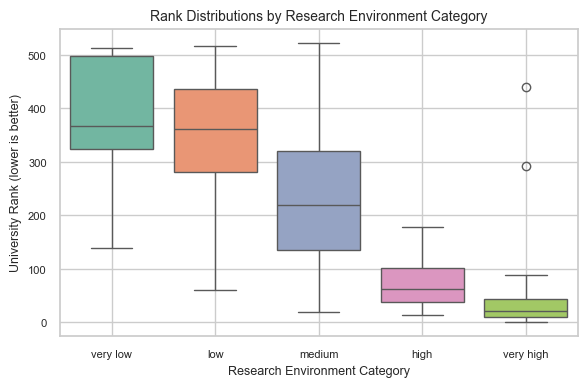

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

def parse_rank(rank_str):
    if pd.isna(rank_str):
        return None
    match = re.match(r'^(\d+)[–-](\d+)$', str(rank_str))
    if match:
        low = int(match.group(1))
        high = int(match.group(2))
        return (low + high) / 2
    try:
        return int(rank_str)
    except ValueError:
        return None

df['rank_display_numeric'] = df['rank_display'].apply(parse_rank)

def categorize_re(search_env):
    if pd.isna(search_env):
        return 'unknown'
    elif search_env < 20:
        return 'very low'
    elif search_env < 40:
        return 'low'
    elif search_env < 60:
        return 'medium'
    elif search_env < 80:
        return 'high'
    else:
        return 'very high'

df['research_env_category'] = df['research_environment'].apply(categorize_re)

plt.figure(figsize=(6, 4)) 
sns.boxplot(
    data=df[df['research_env_category'] != 'unknown'],
    x='research_env_category',
    y='rank_display_numeric',
    order=['very low', 'low', 'medium', 'high', 'very high'],
    palette='Set2'
)

plt.title("Rank Distributions by Research Environment Category", fontsize=10)
plt.xlabel("Research Environment Category", fontsize=9)
plt.ylabel("University Rank (lower is better)", fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

- As the Research Environment score increases from very low to very high, the university rank improves (lower is better). Institutions with a very high research environment consistently appear in top rankings, while those with a very low score are mostly ranked much lower. This suggests a strong positive relationship between research environment quality and global ranking performance.

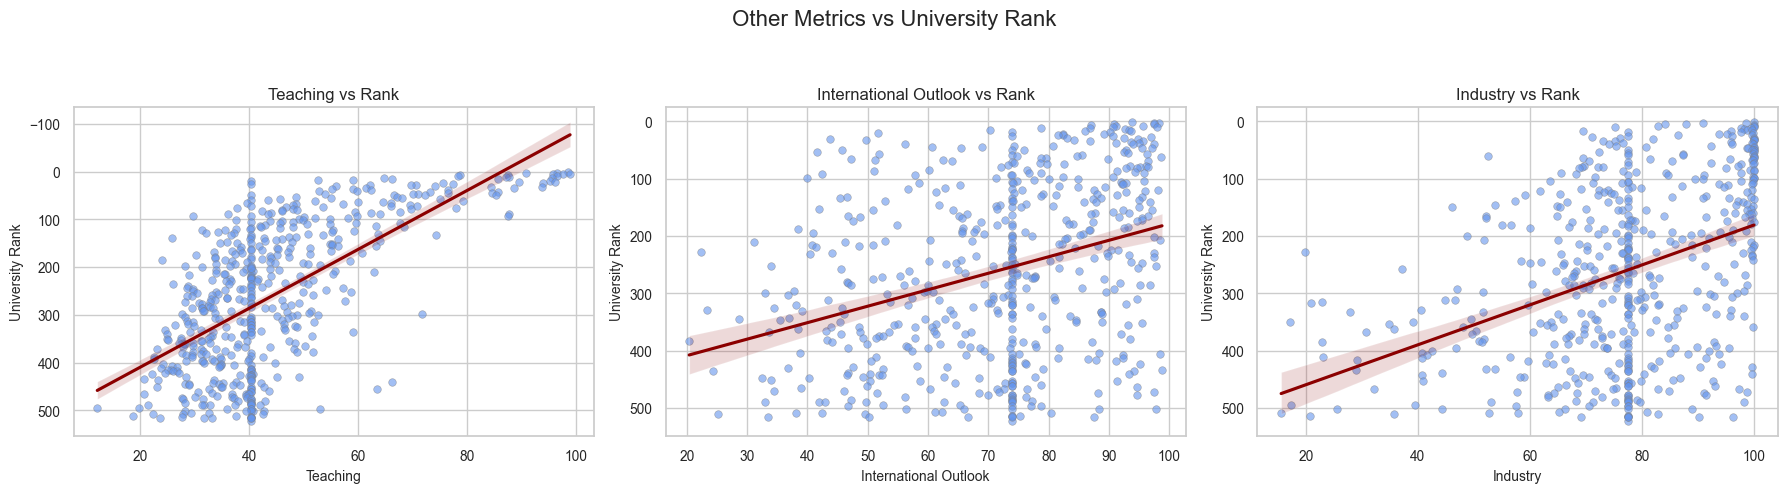

In [56]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

other_cols = ['teaching', 'international_outlook', 'industry']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Other Metrics vs University Rank', fontsize=16)

for idx, col in enumerate(other_cols):
    ax = axes[idx]
    temp_df = df[[col, 'rank_display']].dropna()
    temp_df = temp_df[pd.to_numeric(temp_df[col], errors='coerce').notnull()]
    temp_df = temp_df[pd.to_numeric(temp_df['rank_display'], errors='coerce').notnull()]
    temp_df[col] = temp_df[col].astype(float)
    temp_df['rank_display'] = temp_df['rank_display'].astype(float)

    sns.scatterplot(data=temp_df, x=col, y='rank_display', ax=ax, color='cornflowerblue', s=30, alpha=0.6, edgecolor='gray')
    sns.regplot(data=temp_df, x=col, y='rank_display', scatter=False, color='darkred', ax=ax)

    ax.set_title(f"{col.replace('_', ' ').title()} vs Rank", fontsize=12)
    ax.set_xlabel(col.replace('_', ' ').title(), fontsize=10)
    ax.set_ylabel('University Rank', fontsize=10)
    ax.invert_yaxis() 
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

### ANOVA-Based Investigation

In [64]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

df = df.loc[:, ~df.columns.duplicated()]

anova_data = df[['research_env_category', 'rank_display_numeric']].copy()

def safe_numeric_conversion(series):
    try:
        series = series.astype(str)
        
        series = series.str.replace('[^0-9.-]', '', regex=True)
        series = series.replace(['', 'nan', 'None', 'NA'], np.nan)
        
        return pd.to_numeric(series, errors='coerce')
    except Exception as e:
        print(f"Dönüşüm hatası: {e}")
        return series
anova_data['rank_display_numeric'] = safe_numeric_conversion(anova_data['rank_display_numeric'])

anova_data = anova_data.dropna()
groups = []
for category in ['very low', 'low', 'medium', 'high', 'very high']:
    group_data = anova_data.loc[anova_data['research_env_category'] == category, 'rank_display_numeric']
    if len(group_data) >= 2:
        groups.append(group_data)

if len(groups) >= 2:
    try:
        f_stat, p_value = f_oneway(*groups)
        print(f"F-istatistic: {f_stat:.3f}")
        print(f"p-value: {p_value:.10e}")
        
        if p_value < 0.05:
            print("✅ (p < 0.05)")
        else:
            print("⚠️(p ≥ 0.05)")
    except Exception as e:
        print(f"ANOVA error: {e}")
else:
    print("Error")

F-istatistiği: 107.682
p-değeri: 1.2690094661e-66
✅ Gruplar arasında anlamlı fark var (p < 0.05)


- The ANOVA test confirms a statistically significant difference in university rankings across research environment categories (F = 107.68, p < 1e-66).
This extremely small p-value provides strong evidence that research success is structurally prioritized in global university rankings, supporting the hypothesis of systemic metric bias favoring institutions with high research output.


In [ ]:
from scipy.stats import f_oneway
import pandas as pd
def convert_rank_display(value):
    if pd.isna(value):
        return None
    value = str(value).strip()
    if '-' in value:
        try:
            start, end = value.split('-')
            return (int(start) + int(end)) / 2
        except:
            return None
    try:
        return int(value)
    except:
        return None

df['rank_display_numeric'] = df['rank_display'].apply(convert_rank_display)
anova_region_data = df[['region', 'rank_display_numeric']].dropna()

region_groups = []
for region in anova_region_data['region'].unique():
    group = anova_region_data[anova_region_data['region'] == region]['rank_display_numeric']
    region_groups.append(group)

anova_result_region = f_oneway(*region_groups)
print("F-statistic:", anova_result_region.statistic)
print("p-value:", anova_result_region.pvalue)

### Interpretation of Other Metrics vs University Rank

The visualizations above present the relationships between Teaching, International Outlook, and Industry Income scores and university rankings. Unlike research-related metrics, these variables exhibit relatively weaker and more dispersed associations with rank.
	•	In the Teaching vs Rank plot, although there is a mild negative trend, the wide spread of points suggests that teaching quality alone does not strongly determine a university’s global standing.
	•	The International Outlook plot shows a very scattered pattern, indicating a weak and inconsistent relationship. Universities with both high and low outlook scores are distributed across the ranking spectrum.
	•	For Industry Income, although a slight downward trend is visible, many top-ranked universities do not necessarily report high income from industry collaborations.

Overall, while these metrics may contribute to overall institutional performance, they do not appear to be primary drivers of global rankings.
This reinforces the hypothesis that research quality and success are far more critical in determining a university’s position in international rankings.

In [ ]:
from scipy.stats import ttest_ind
median_outlook = df['international_outlook'].median()

high_outlook = df[df['international_outlook'] >= median_outlook]['research_environment'].dropna()
low_outlook = df[df['international_outlook'] < median_outlook]['research_environment'].dropna()
t_stat, p_value = ttest_ind(high_outlook, low_outlook, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("✅ Result: There is a significant difference between the two groups.")
    print("🌍 Universities with higher International Outlook scores tend to have better Research Environment scores.")
else:
    print("⚠️ Result: There is no statistically significant difference between the groups.")


### T-Test Interpretation

The t-test results (T = 6.61, p < 0.001) indicate a strong association between international outlook and research environment.  
Universities with a stronger international presence tend to maintain better research quality, reinforcing the project's main hypothesis.

In [ ]:
from scipy.stats import ttest_ind

median_outlook = df['international_outlook'].median()
high_outlook = df[df['international_outlook'] >= median_outlook]['research_environment'].dropna()
low_outlook = df[df['international_outlook'] < median_outlook]['research_environment'].dropna()

t_stat, p_value = ttest_ind(high_outlook, low_outlook, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Result: There is a significant difference.")
    print("Universities with higher international outlook scores tend to have stronger research environments.")
    print("This supports the hypothesis that international metrics are structurally favored in ranking systems.")
else:
    print("Result: No significant difference found.")
    print("There is no clear evidence that international outlook is associated with stronger research environments.")

## HYPOTHESİS TESTİNG

#### Final Interpretation: Regional Influence on University Rankings

- In the final stage of our analysis, we conducted a one-way ANOVA test to evaluate 
whether a university's region (continent) has a statistically significant impact 
on its global ranking position.

Test Results:
F-statistic: 3.81
p-value: 0.0046

#### What does this mean?

- Since the p-value is well below the conventional threshold of 0.05, 
we reject the null hypothesis that university rankings are uniformly 
distributed across regions.

-> University rankings are significantly different between continents.

#### Why does this matter?
- This supports our central hypothesis: Ranking systems may structurally favor universities from certain regions.

- Even when controlling for institutional quality factors like research strength, 
regional location still influences rank. This highlights that prestige is not 
only earned — it's also geographically conditioned.

## 📌 Conclusion
This analysis provides compelling evidence that global university rankings are not entirely objective, but instead reflect systemic regional biases. Despite accounting for critical institutional factors such as research performance and international outlook, the region in which a university is located remains a statistically significant predictor of its overall rank.

The ANOVA test revealed that ranking scores differ meaningfully across continents, suggesting that universities from certain regions are structurally advantaged or disadvantaged within current ranking methodologies. These findings challenge the assumed neutrality of global rankings and highlight the importance of reassessing the weight and interpretation of geographical factors.

In short, ranking systems may not only measure academic excellence—they also mirror global power dynamics, perpetuating prestige gaps between regions. Recognizing this bias is the first step toward building a more equitable framework for evaluating global higher education.

### Additional Insight: The Link Between International Outlook and Research Environment

To explore potential secondary relationships in the dataset, an independent t-test was conducted to assess whether universities with higher International Outlook scores also perform better in terms of Research Environment. The universities were divided into two groups based on the median international outlook score.

The test yielded a t-statistic of 6.61 and a p-value of 7.39e-11, indicating a statistically significant difference between the two groups. This suggests that universities with higher international visibility tend to also provide a stronger research environment.

While this relationship does not directly challenge or change the central hypothesis, it offers an important perspective: international collaboration and recognition may play a supporting role in research success.